In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1314,2020-08-16,United Kingdom,317579.0,316367.0,37130.0,41358.0,1212.0,-4228.0
1315,2020-08-16,Germany,224131.0,223453.0,9249.0,9231.0,678.0,18.0
1316,2020-08-16,Iran,342586.0,341070.0,19572.0,19492.0,1516.0,80.0
1317,2020-08-16,Turkey,247953.0,248117.0,5953.0,5955.0,-164.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  5142.269901440485
RMSE =  18746.167475283375


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.01819560272935
RMSE =  713.508825328094


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  32809.19841269841
RMSE =  57826.330359939195
-- World performances for deaths --
MAE =  1569.531746031746
RMSE =  1931.7095500396238


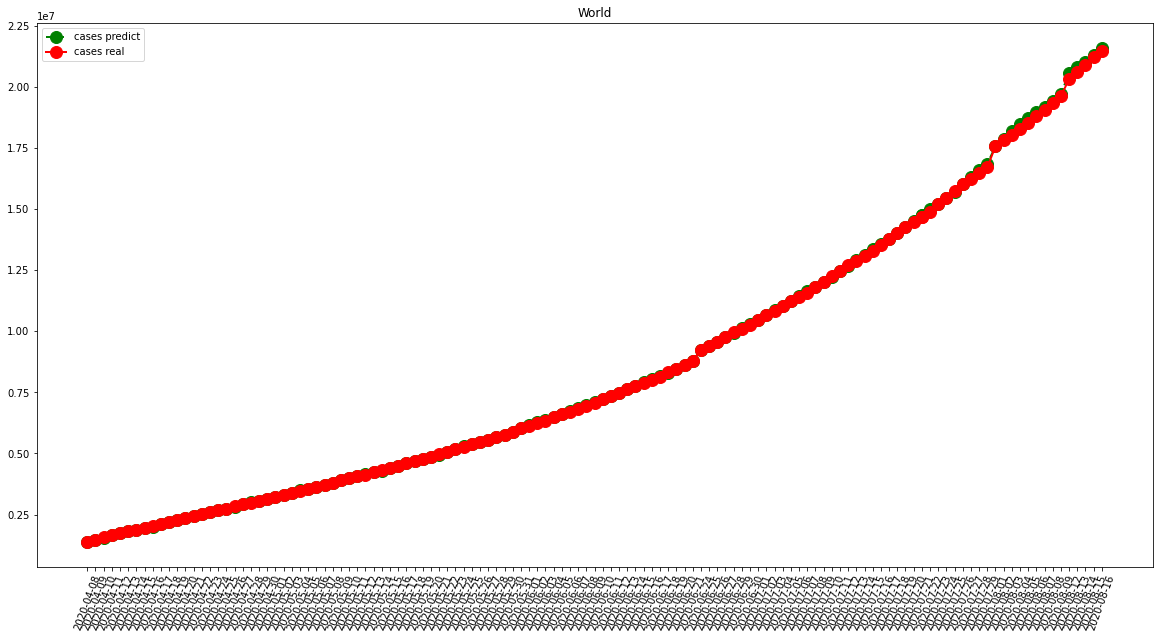

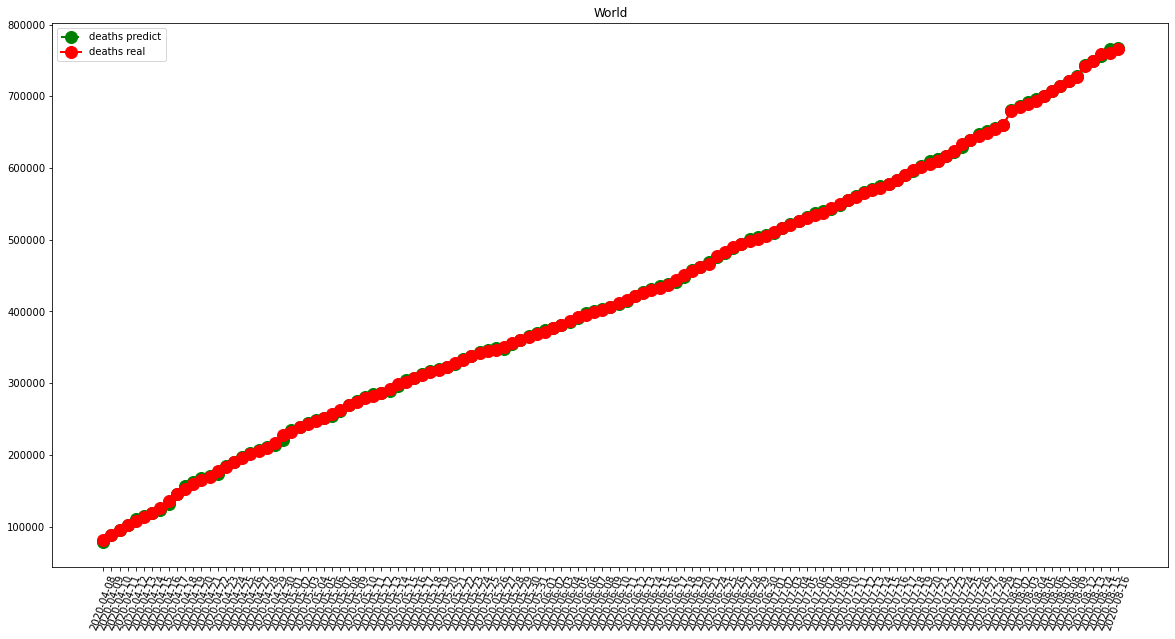

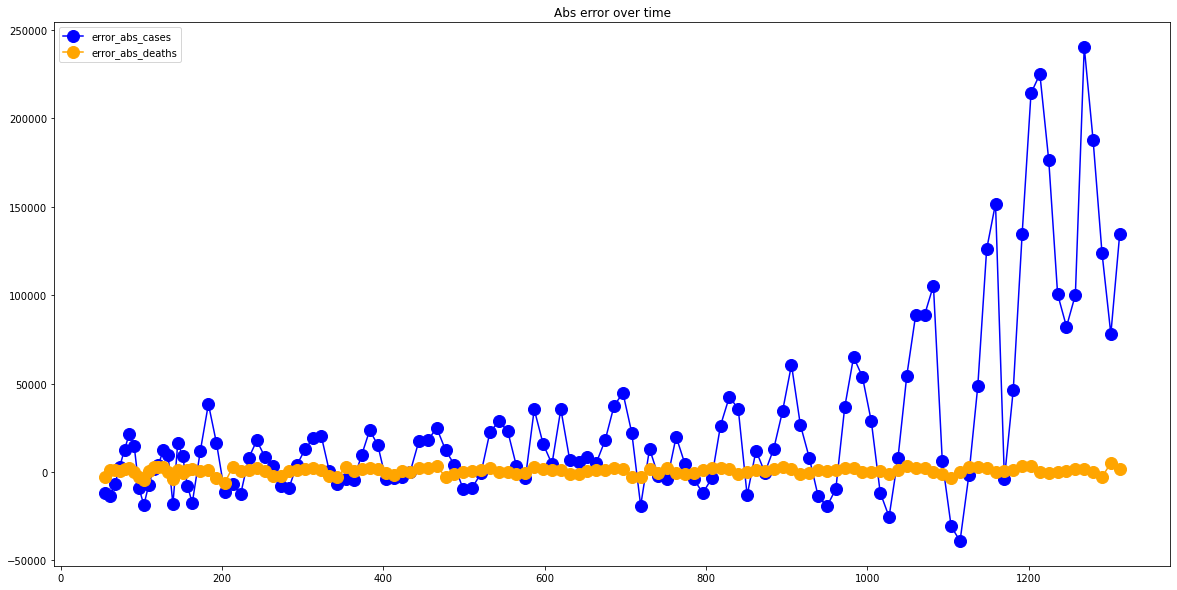

In [7]:
visShow("World")

-- France performances for cases --
MAE =  886.7720588235294
RMSE =  1368.6123742252053
-- France performances for deaths --
MAE =  134.98529411764707
RMSE =  287.49979539634666


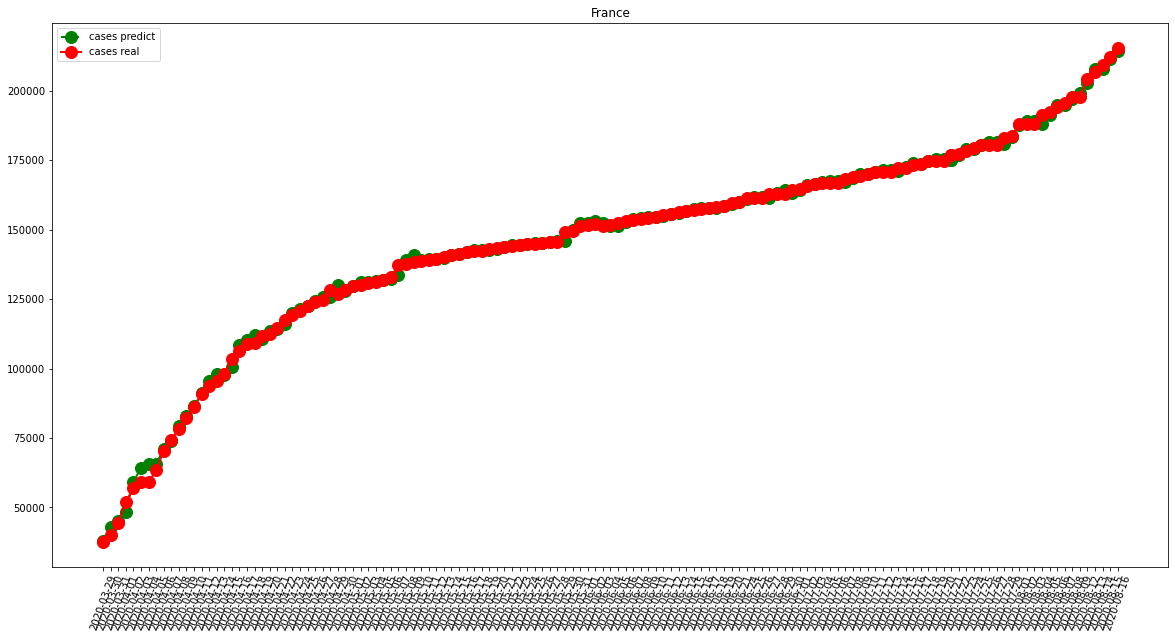

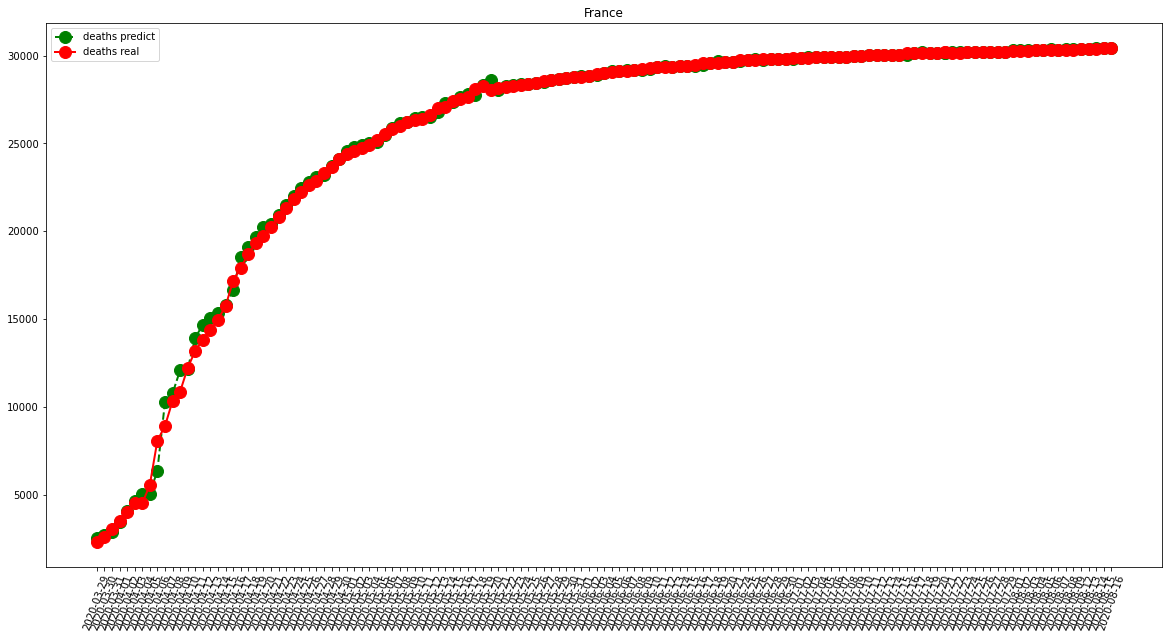

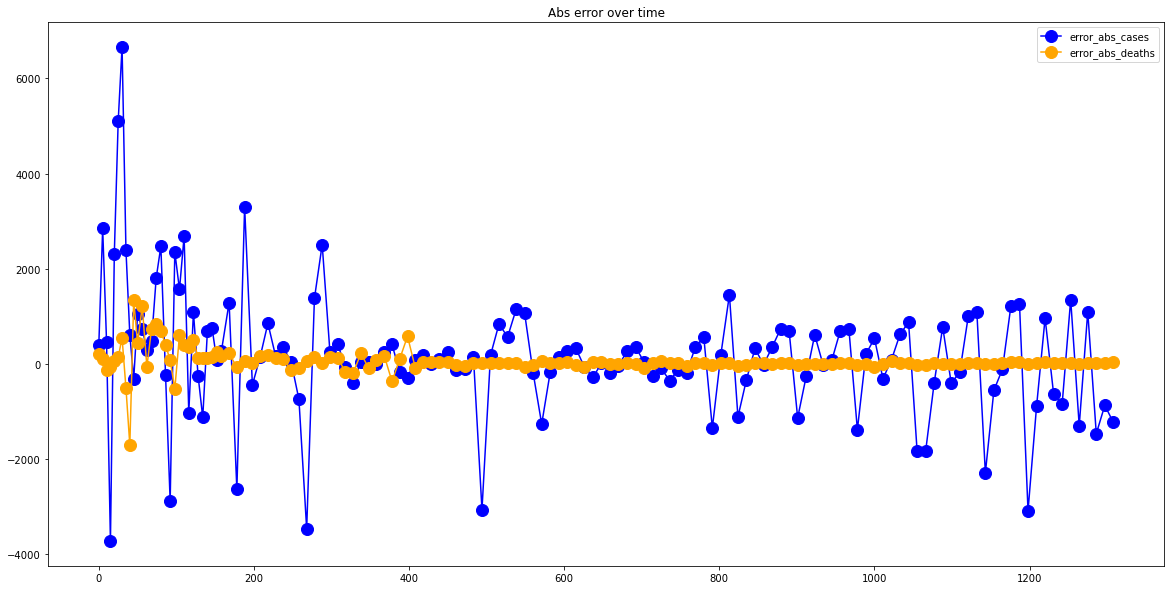

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  306.50735294117646
RMSE =  470.6308422807438
-- Italy performances for deaths --
MAE =  78.55147058823529
RMSE =  254.11992016276372


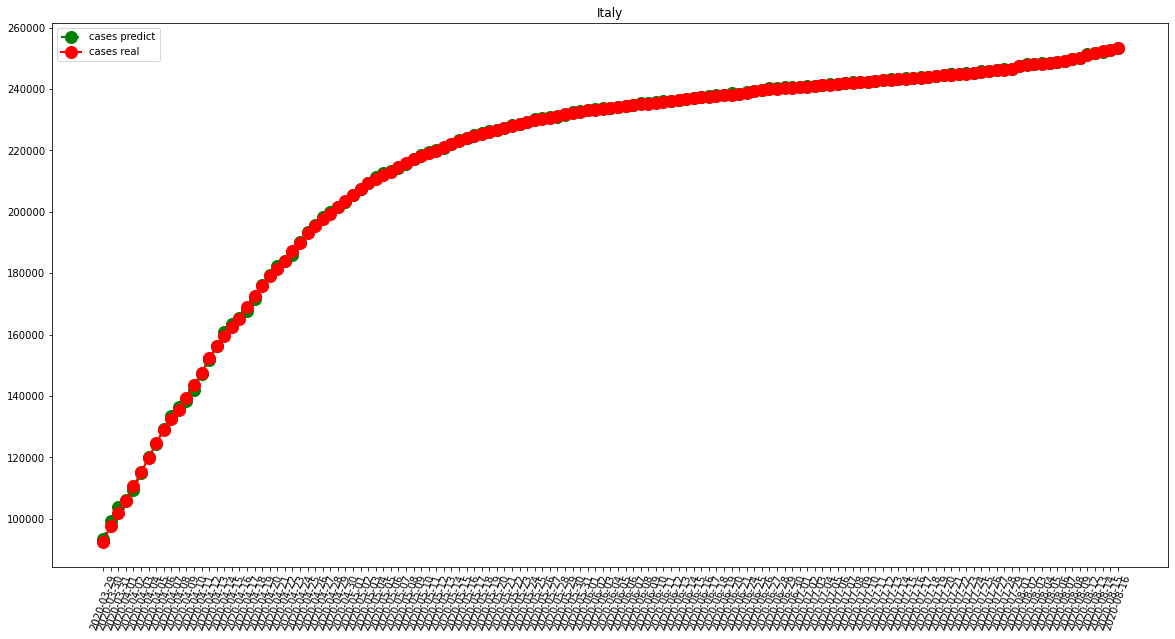

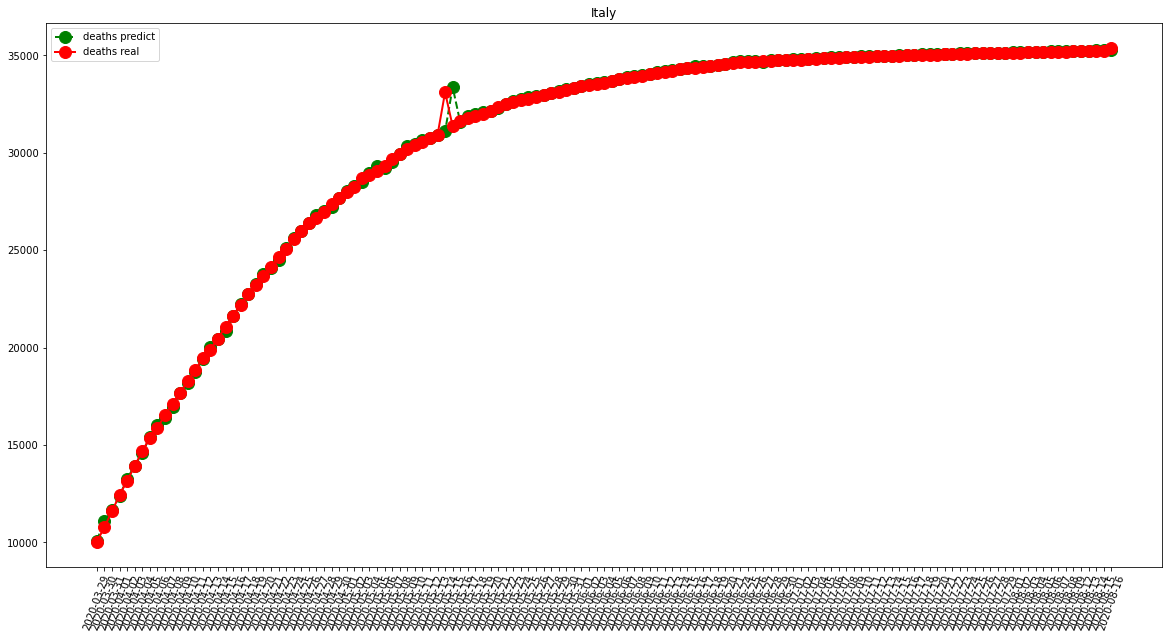

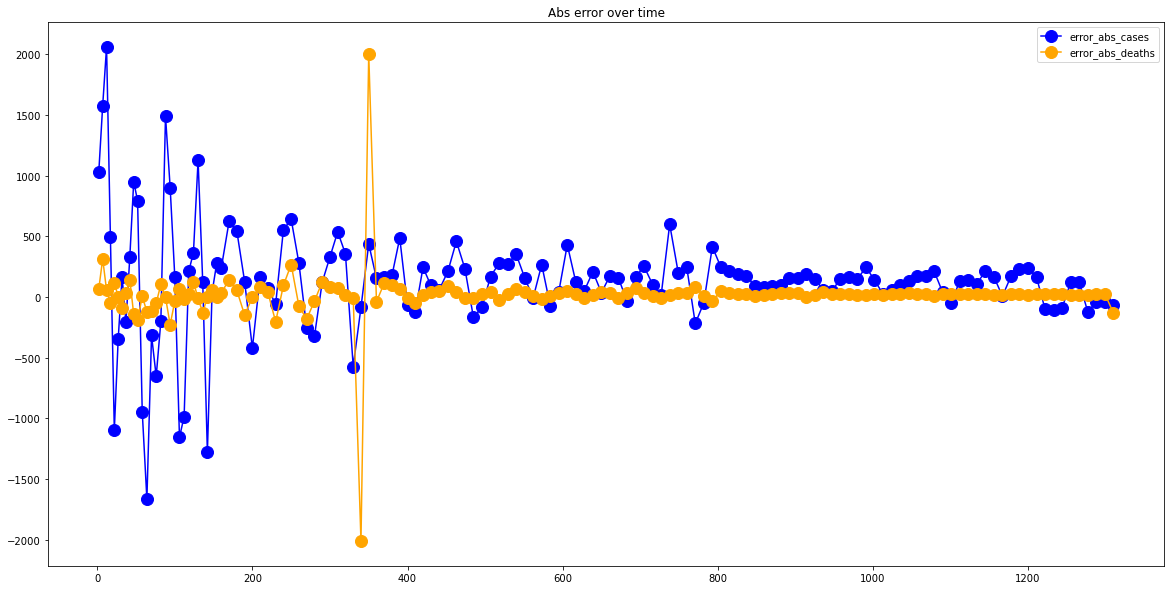

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1284.5220588235295
RMSE =  2389.413410971281
-- Spain performances for deaths --
MAE =  137.19117647058823
RMSE =  348.15904496111443


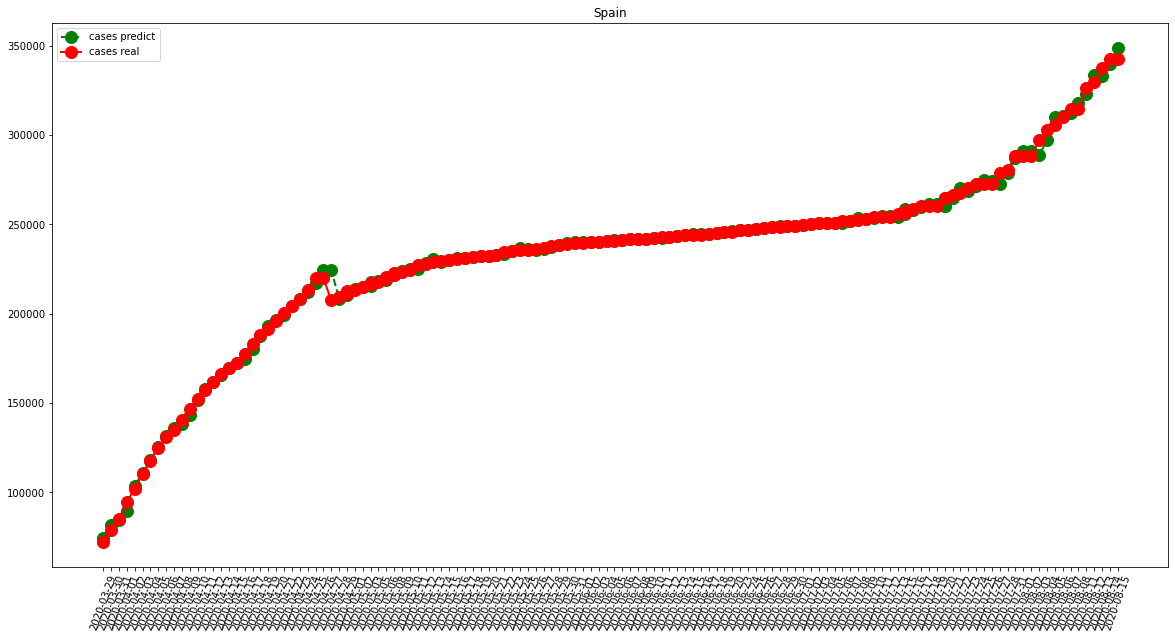

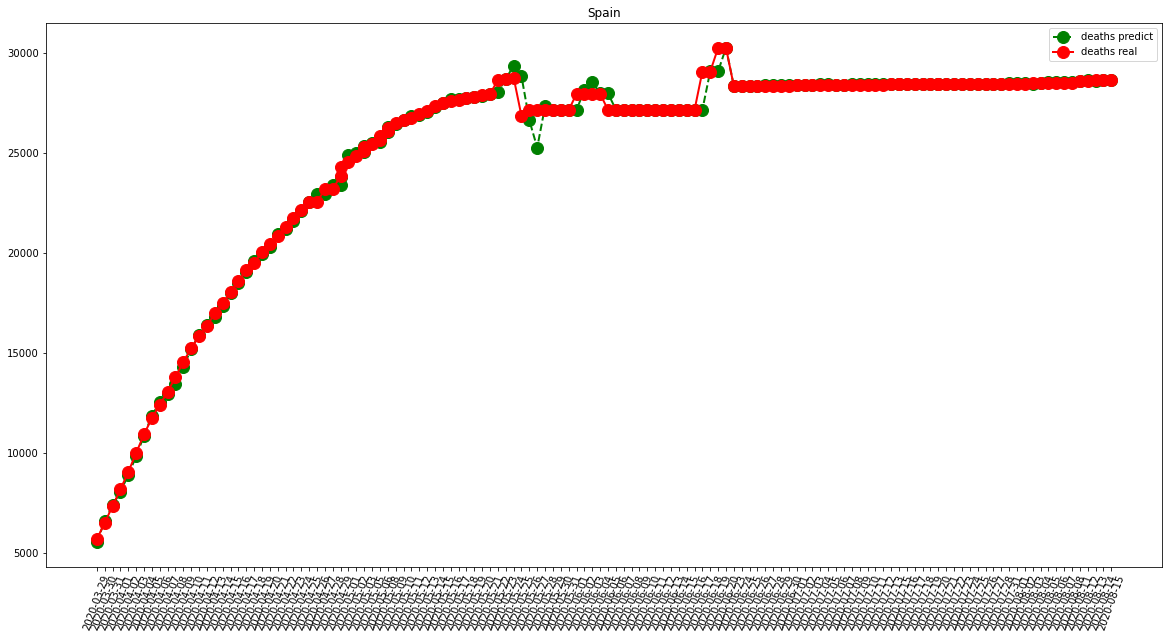

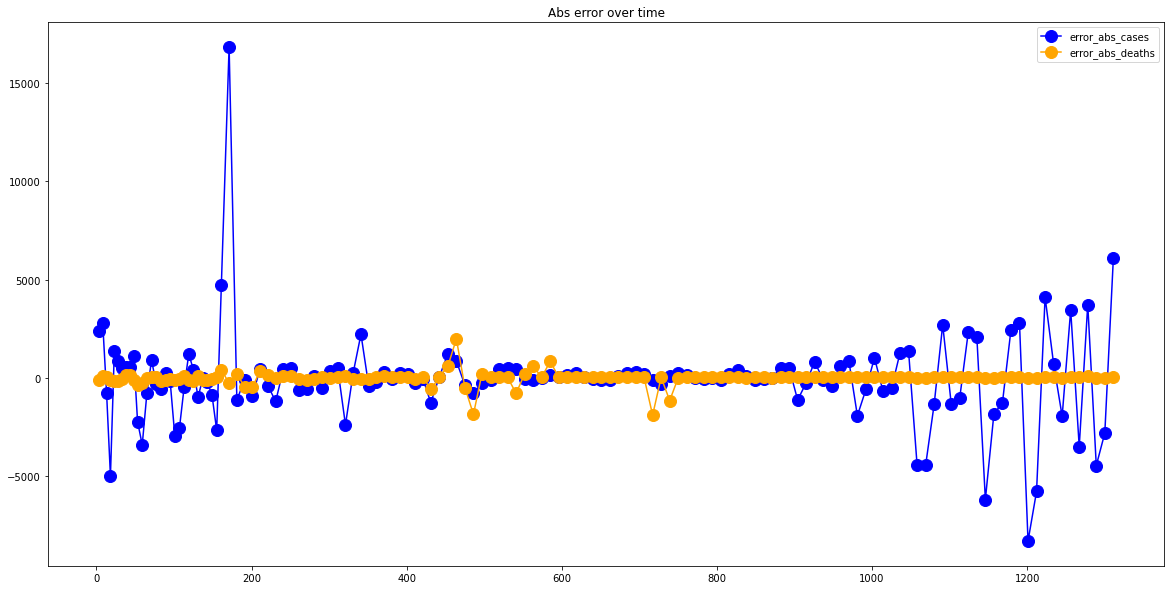

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  8070.117647058823
RMSE =  11955.498409543126
-- United States performances for deaths --
MAE =  492.9632352941176
RMSE =  709.107708777065


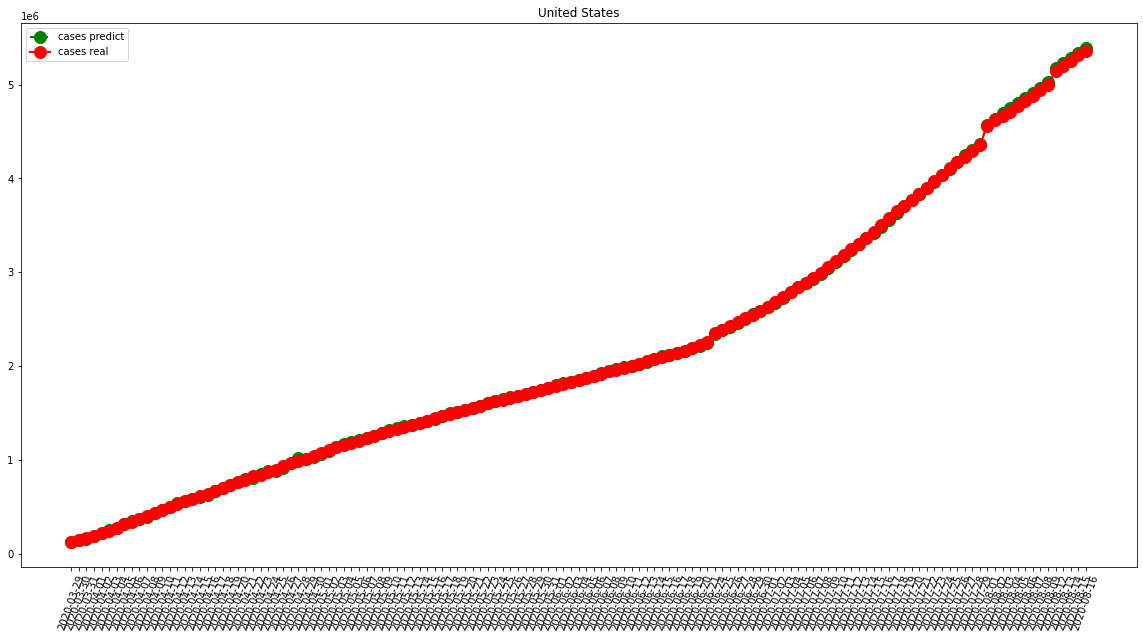

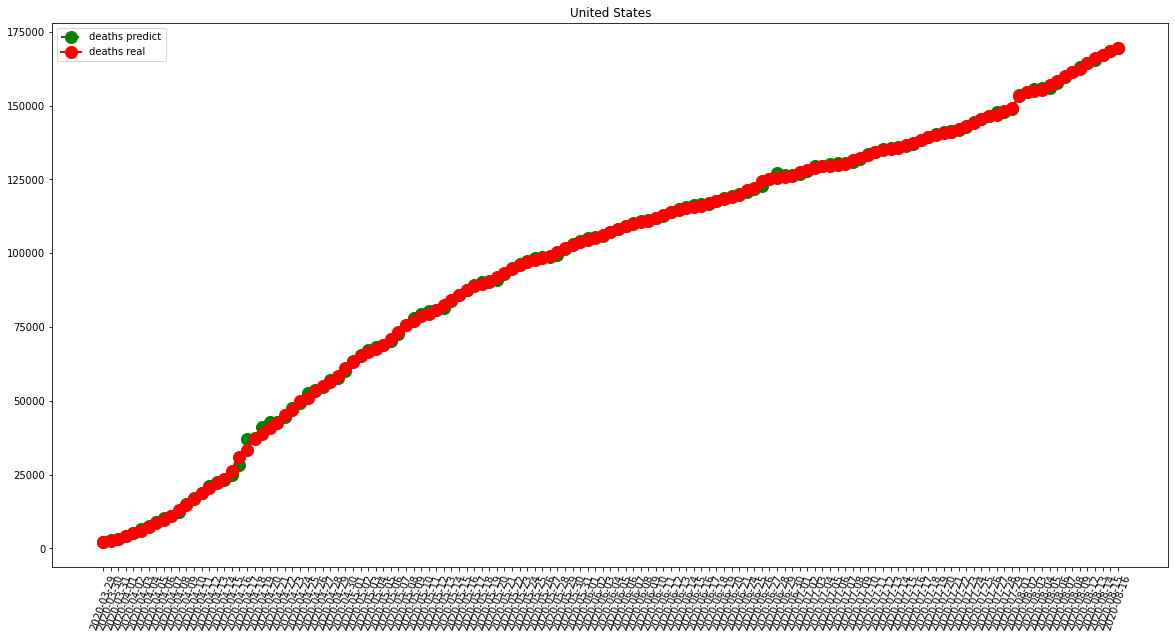

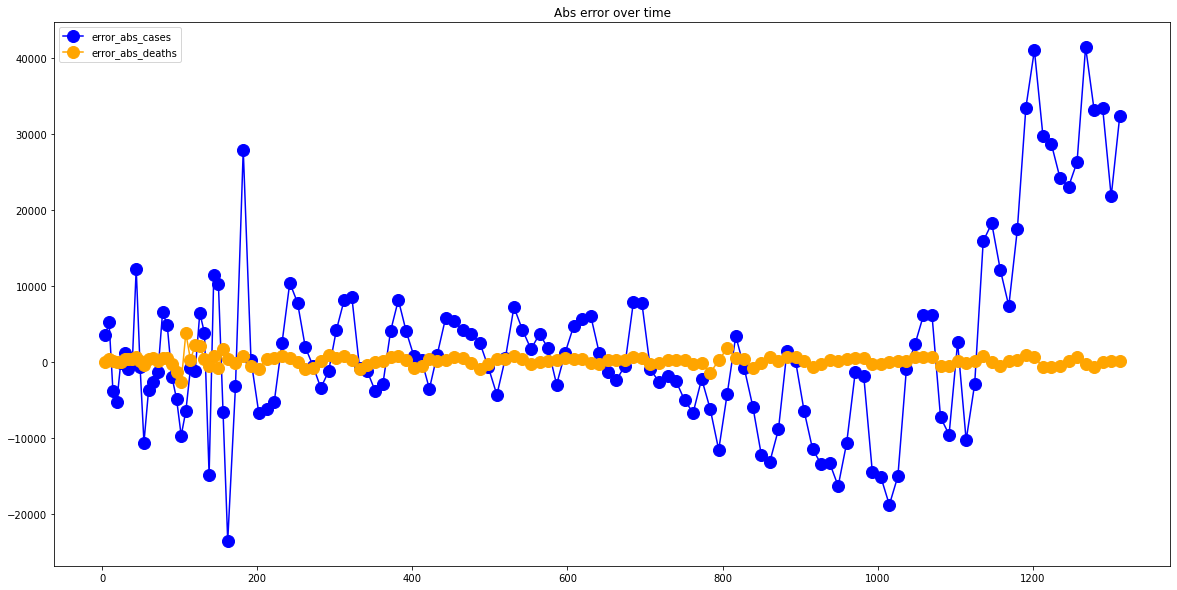

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  72.38970588235294
RMSE =  102.21419983083966
-- China performances for deaths --
MAE =  30.03676470588235
RMSE =  134.6325882672149


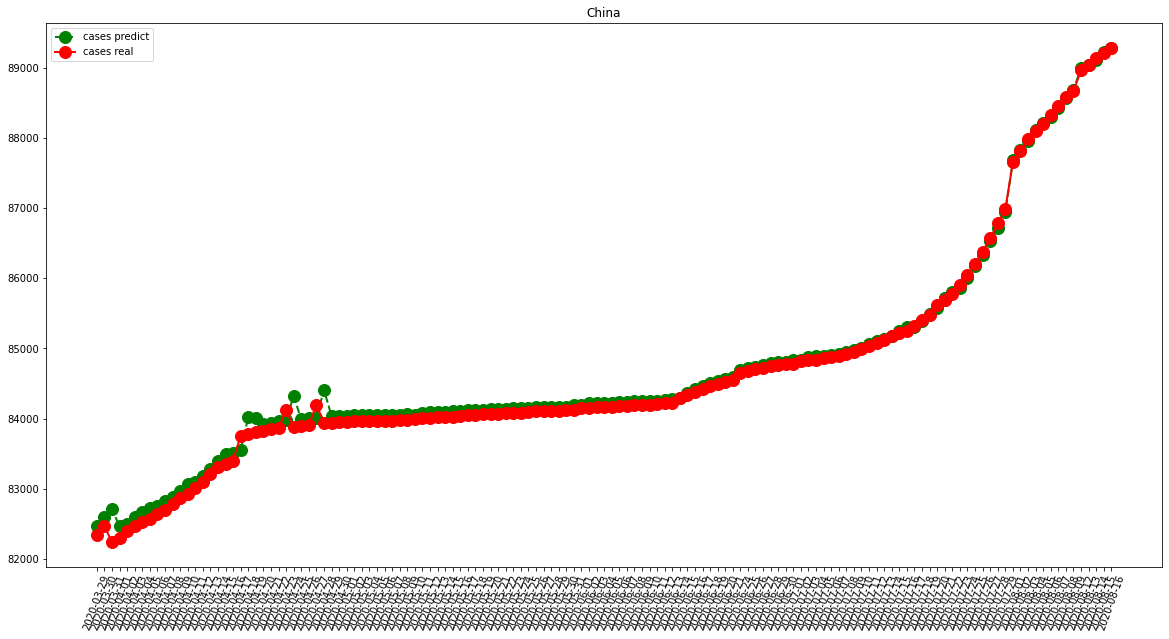

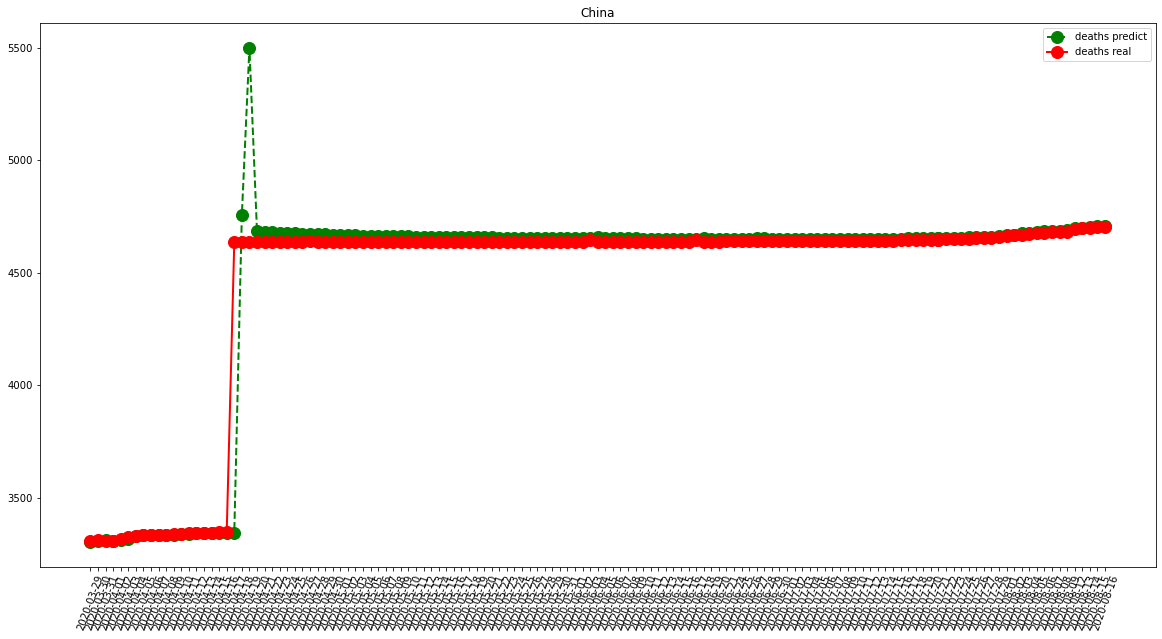

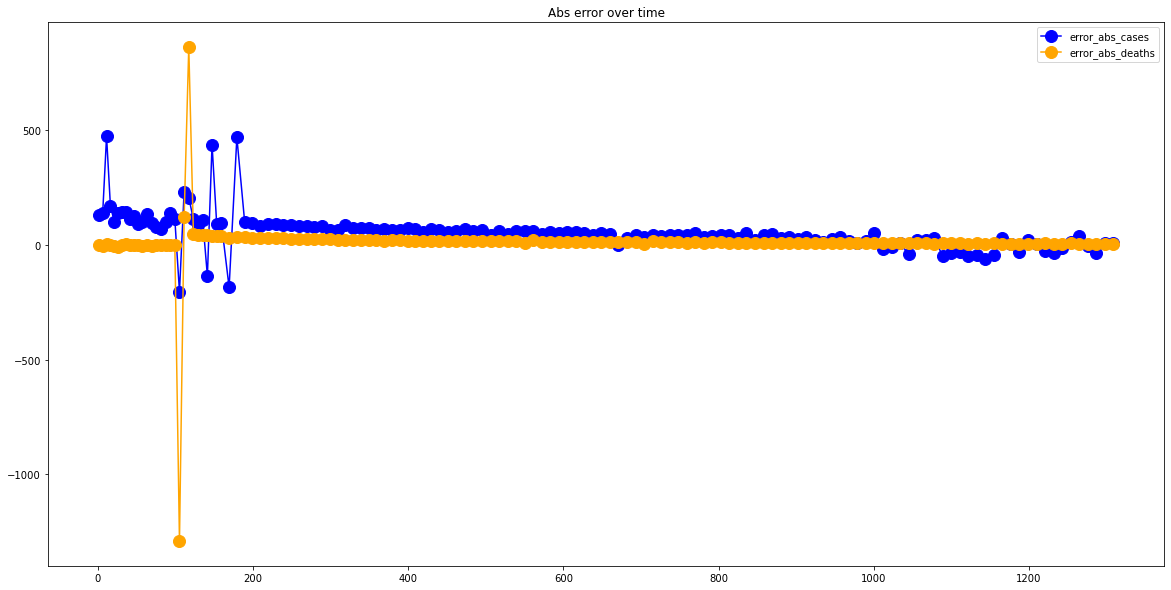

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1186.3796296296296
RMSE =  4022.17195448945
-- United Kingdom performances for deaths --
MAE =  274.14814814814815
RMSE =  821.0449417031301


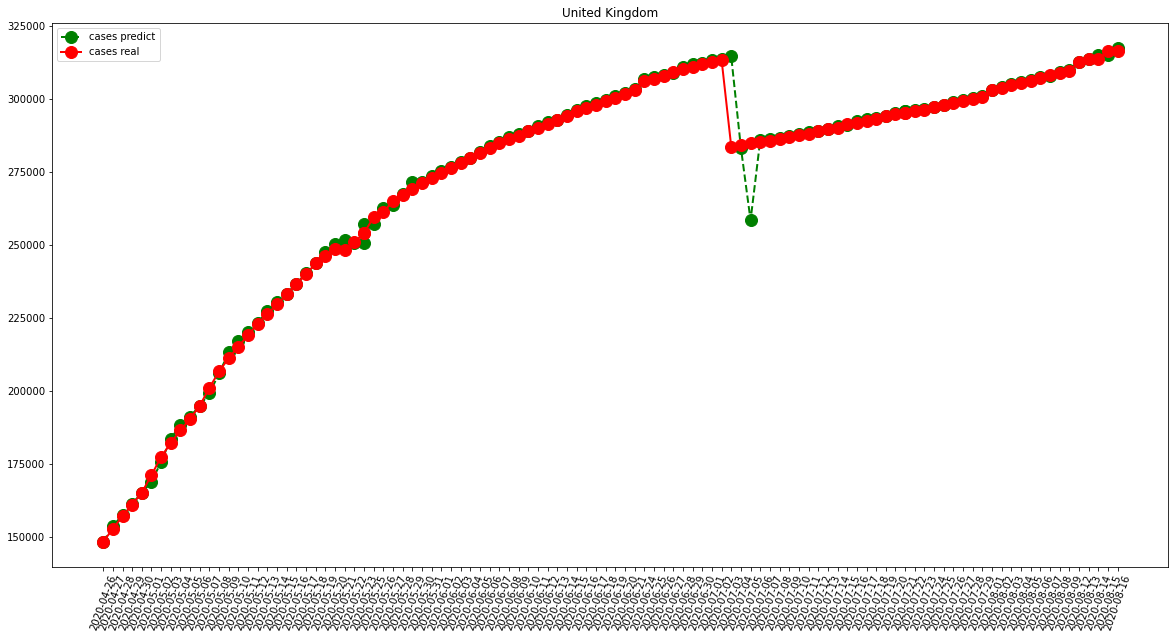

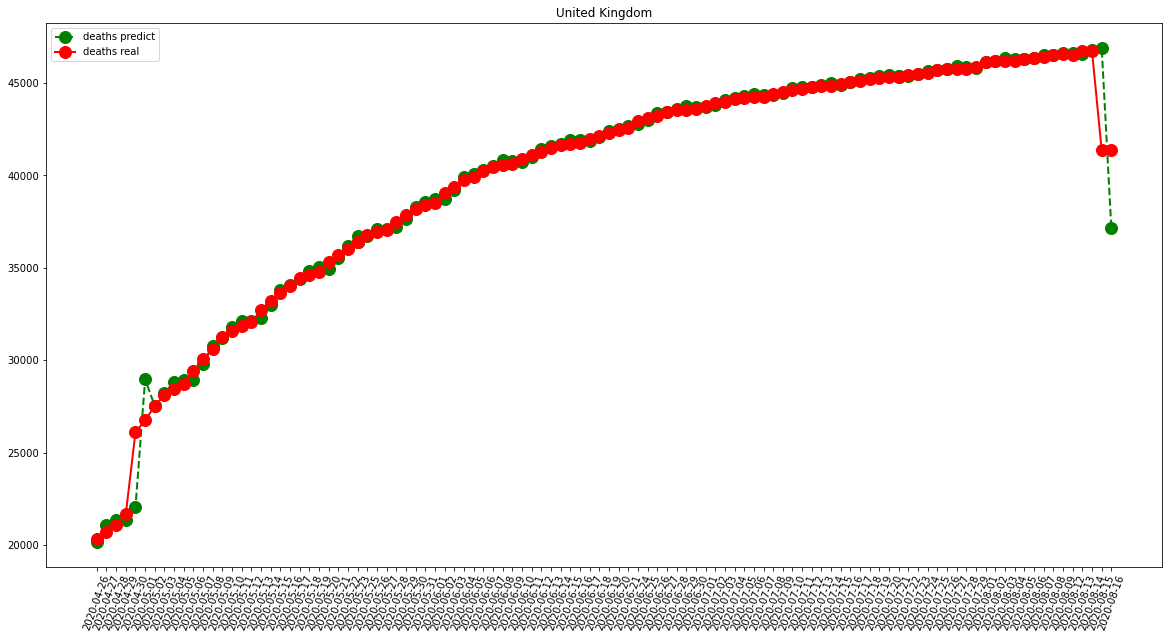

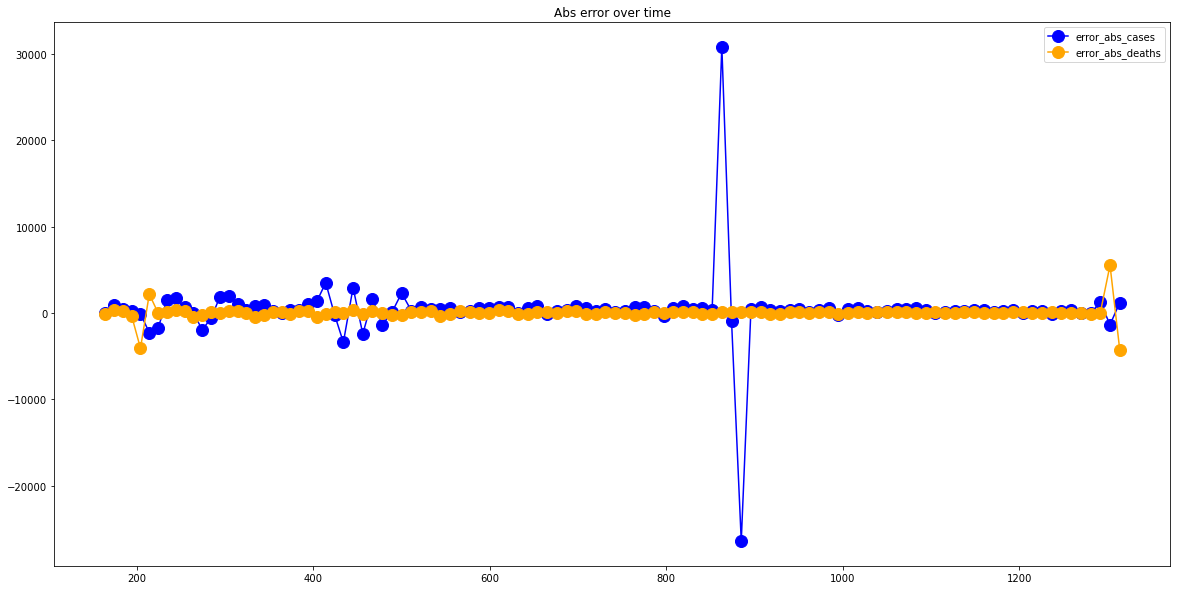

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  322.2037037037037
RMSE =  443.95803939194604
-- Germany performances for deaths --
MAE =  23.203703703703702
RMSE =  42.18675410863251


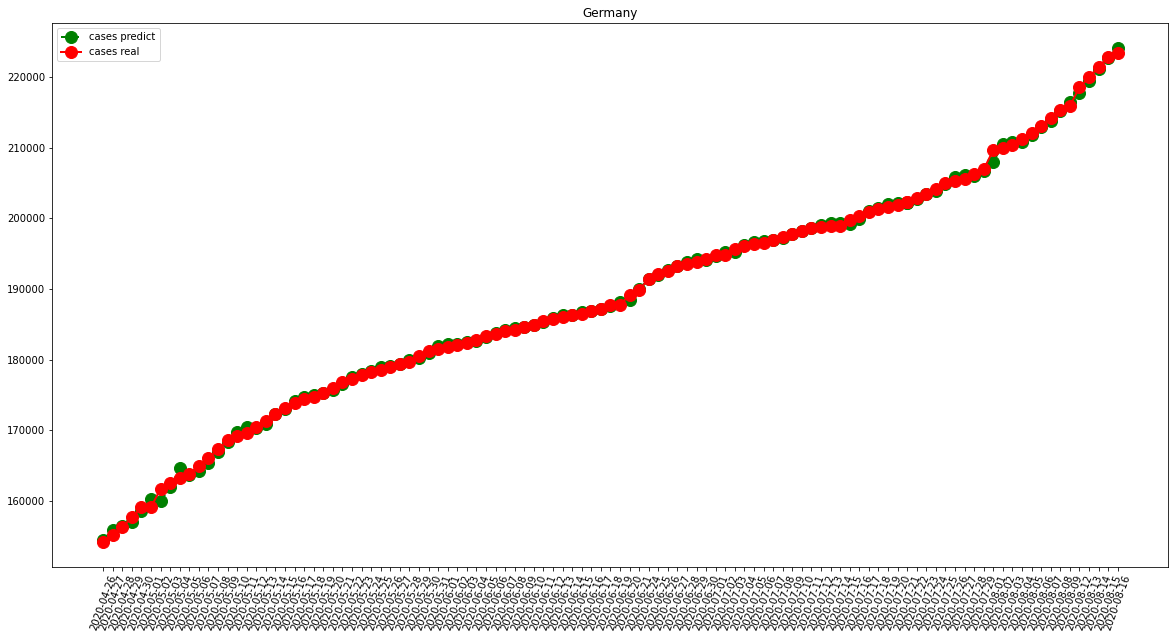

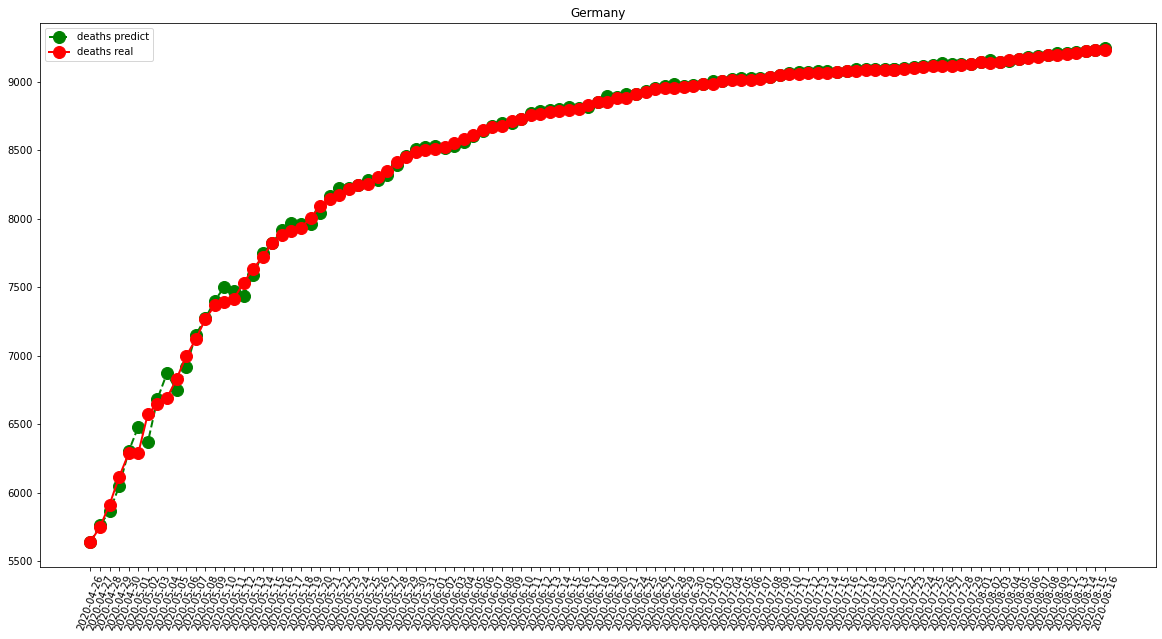

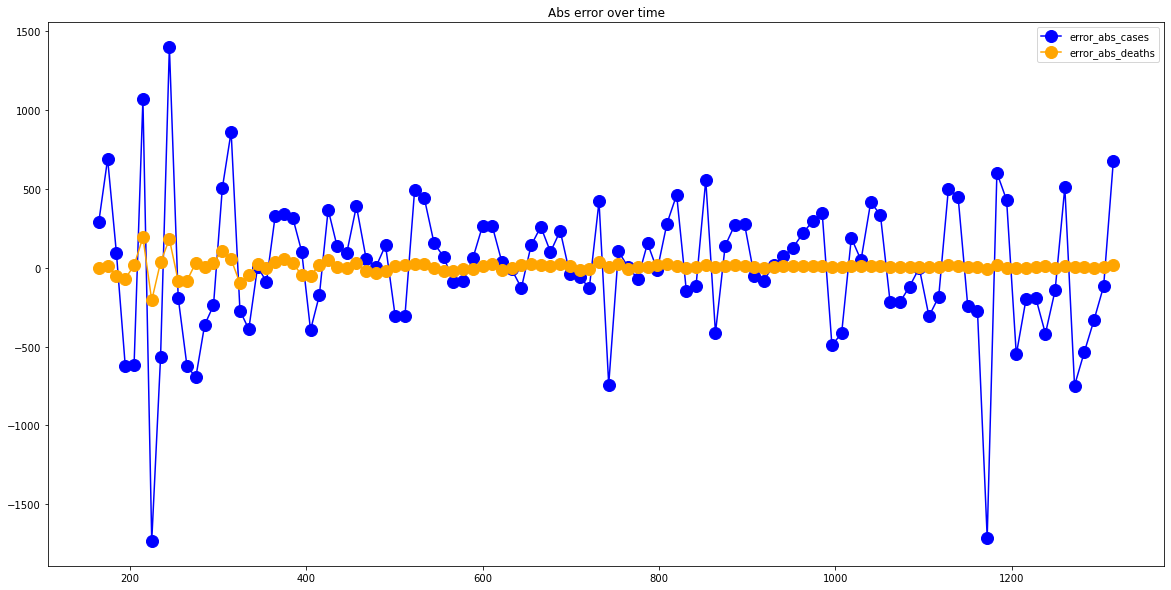

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  624.9166666666666
RMSE =  919.0316109100121
-- Iran performances for deaths --
MAE =  33.00925925925926
RMSE =  69.8668707588198


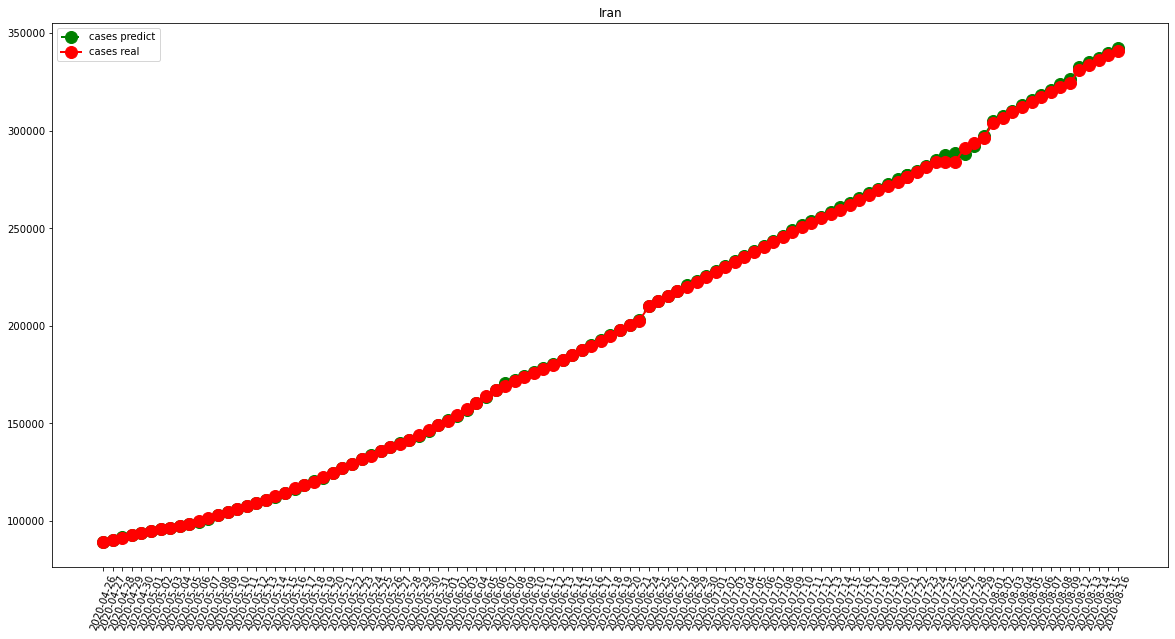

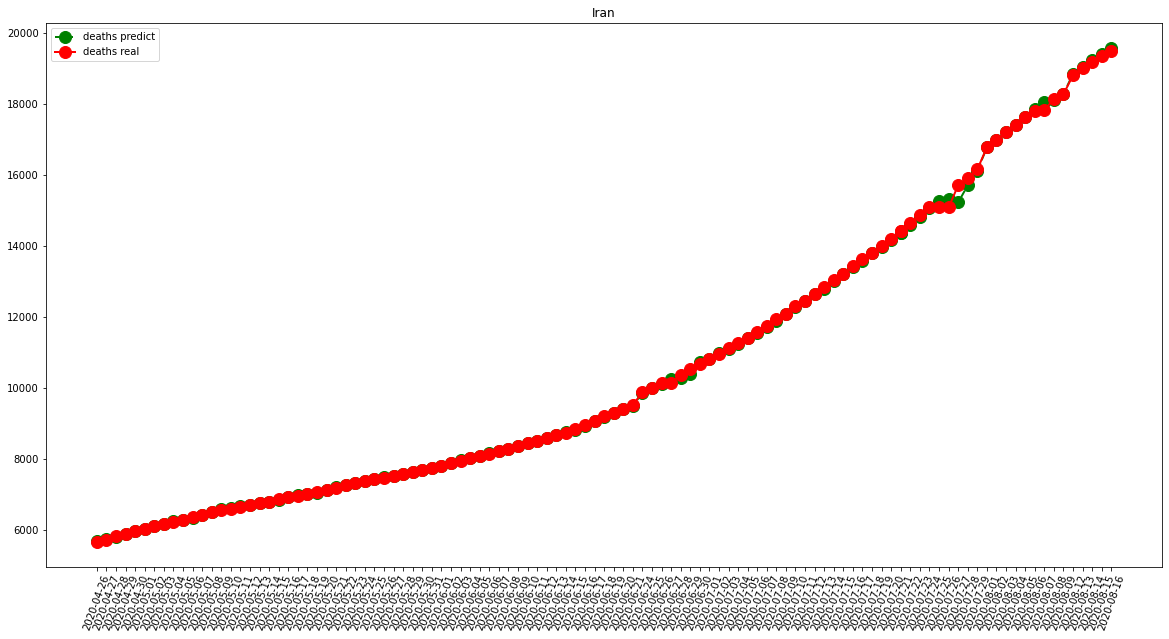

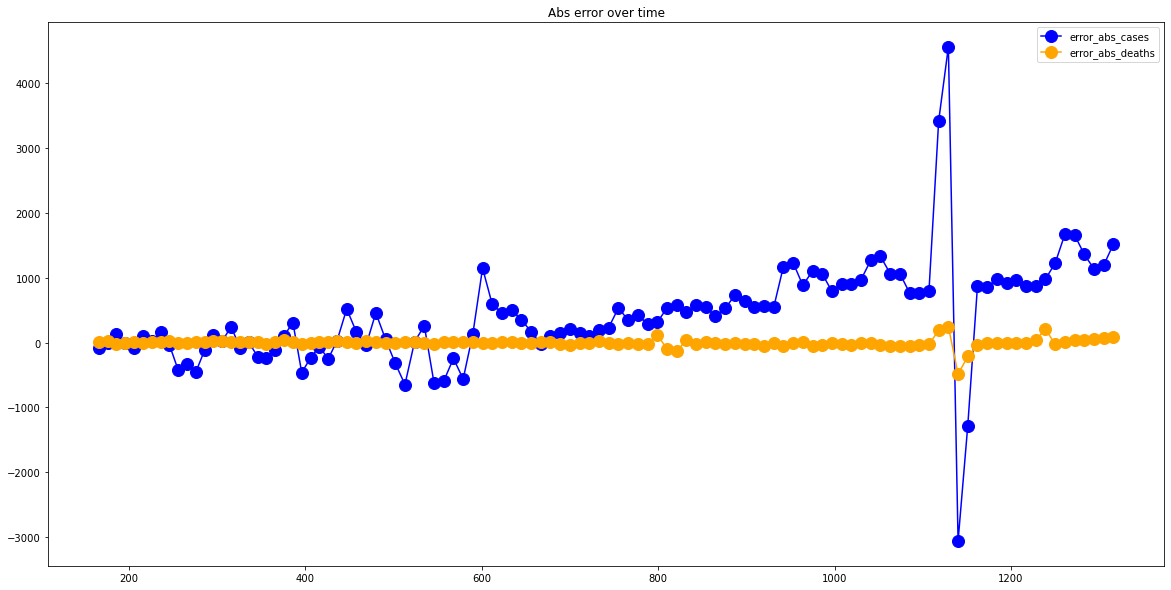

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  197.7314814814815
RMSE =  335.2445900908547
-- Turkey performances for deaths --
MAE =  17.833333333333332
RMSE =  97.68524662100928


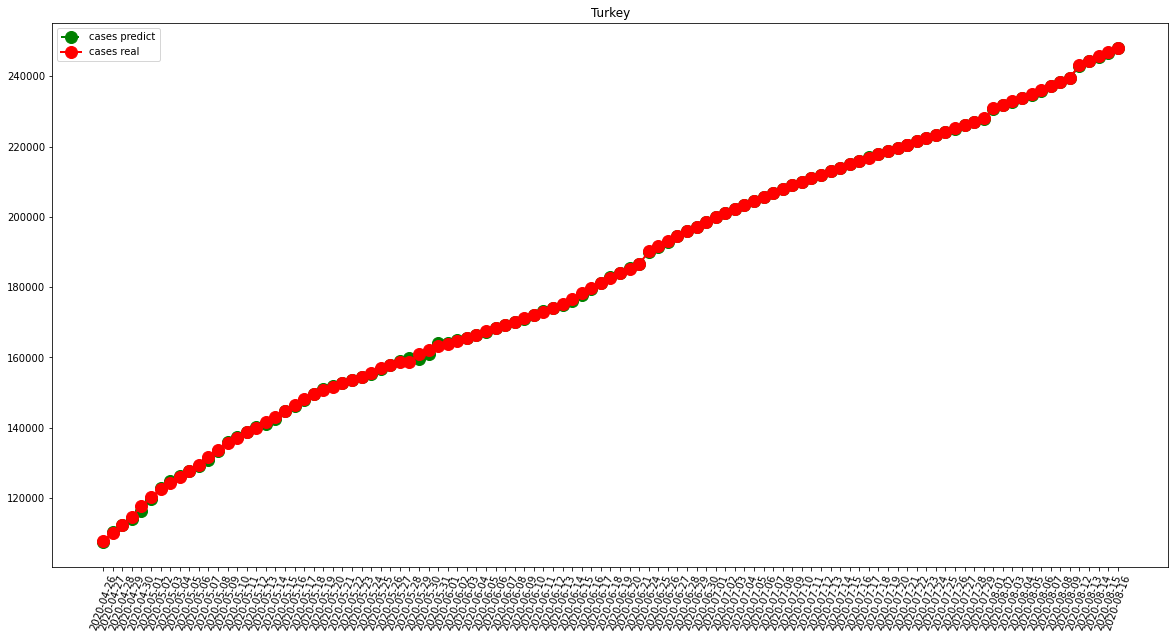

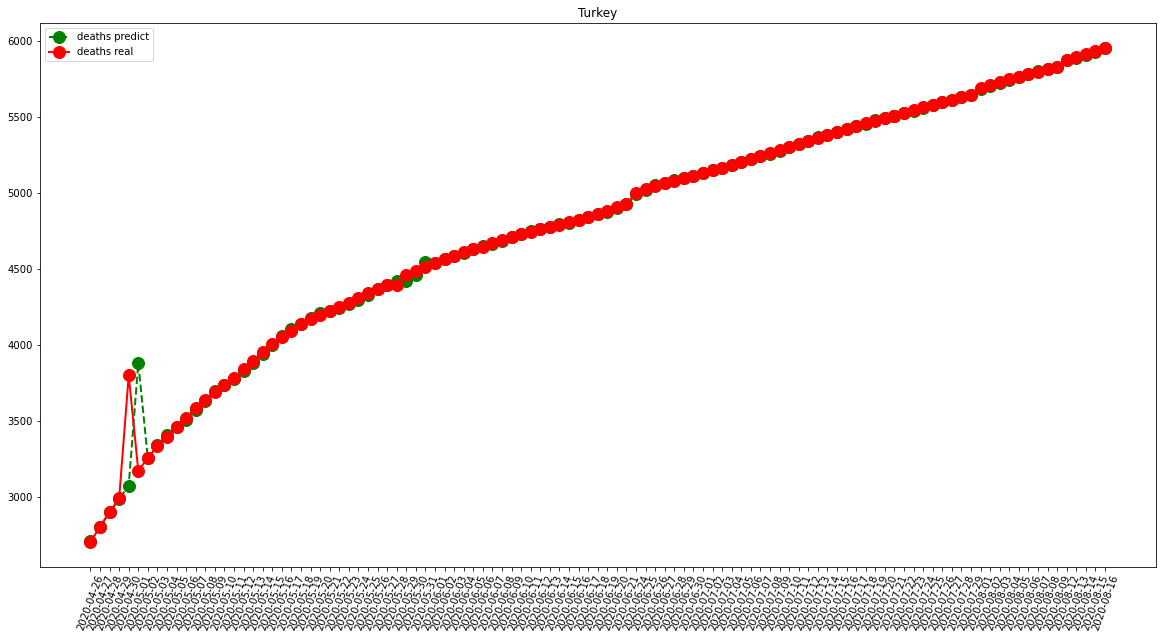

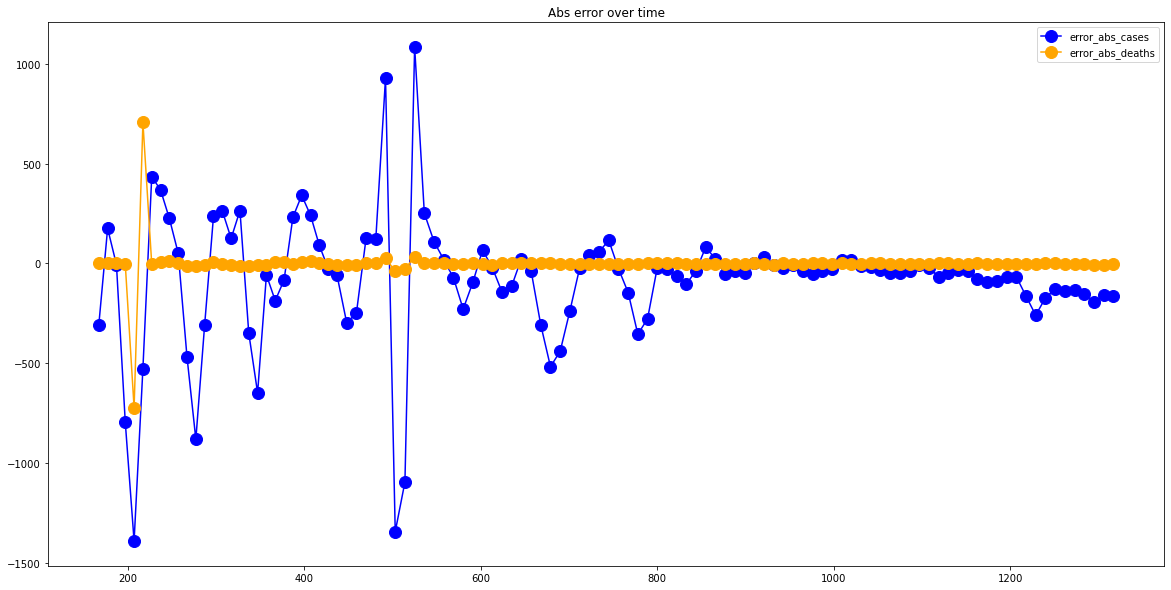

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11760.0
RMSE =  15641.95314443946
-- Brazil performances for deaths --
MAE =  398.74074074074076
RMSE =  489.55865737656575


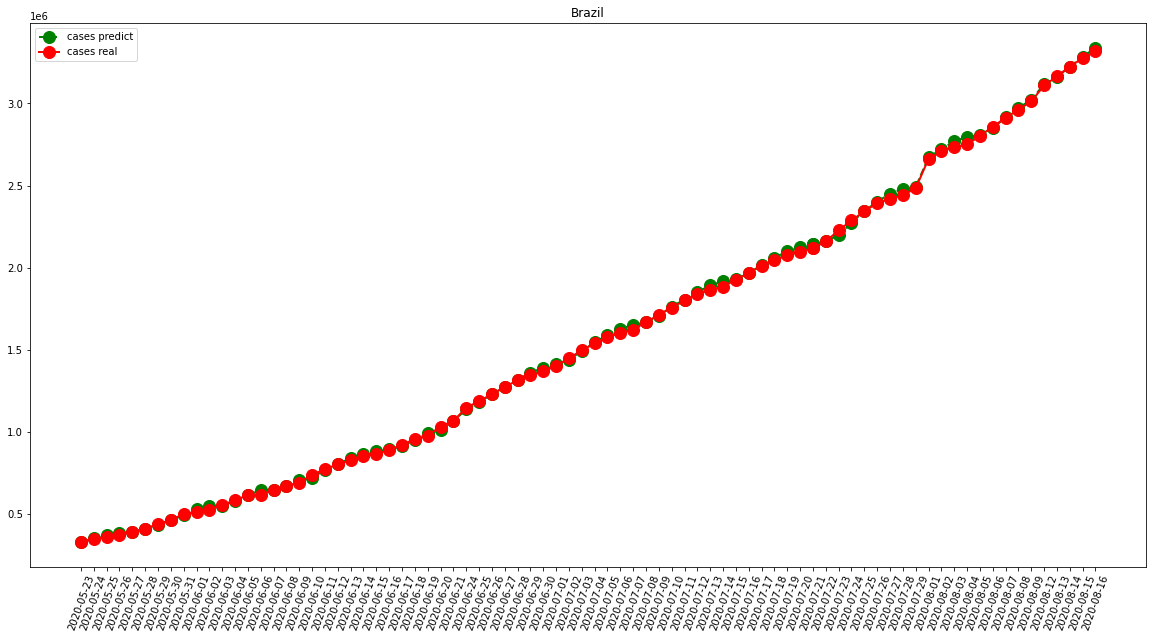

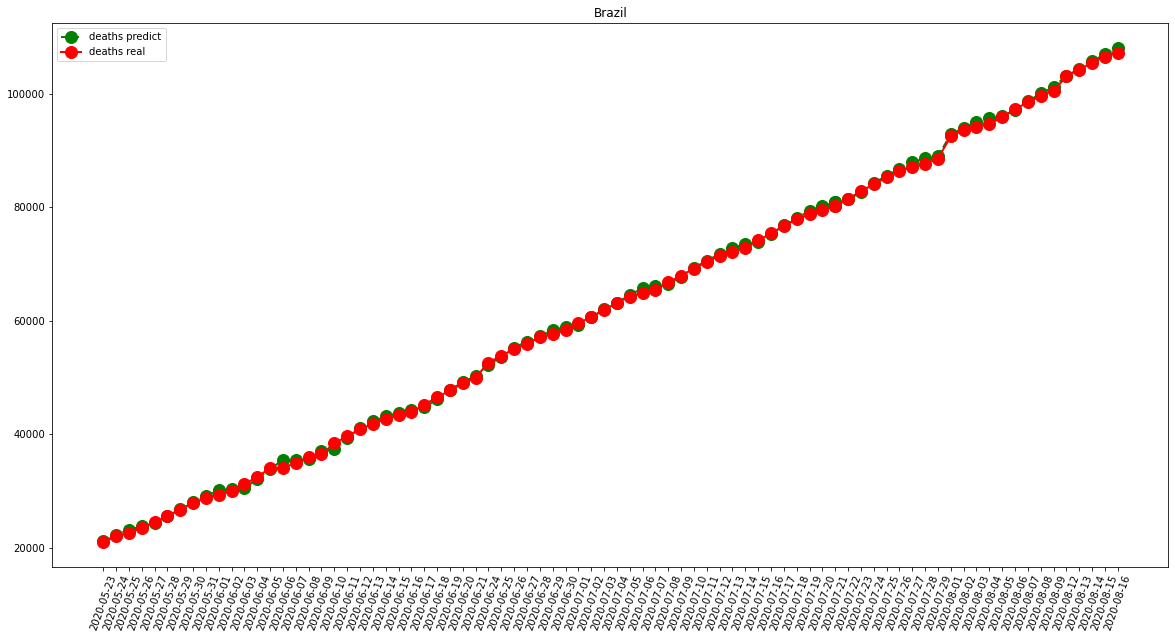

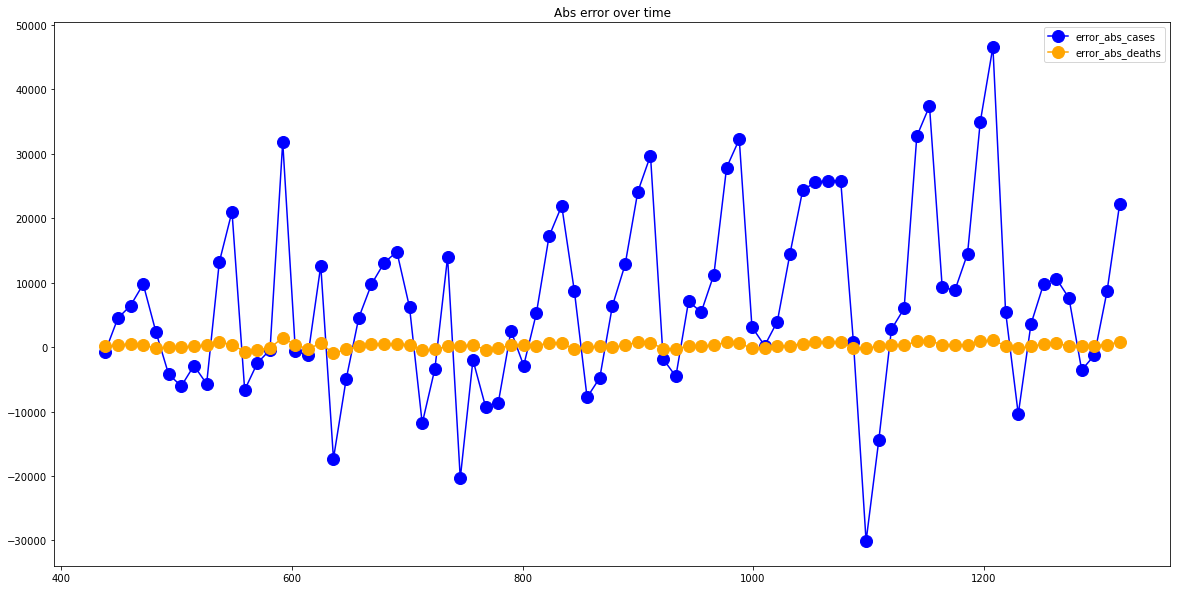

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)